# Precision/Recall Trade-off
[2022.08.31]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 # 간단한 전처리

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score , recall_score
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/git_colab/machinelearning_tutorial/train.csv')
df.drop(columns = ['Name','Ticket','Cabin','PassengerId'], axis = 1, inplace = True)
df['Age'].fillna(df['Age'].mean(), inplace = True)
df = pd.get_dummies(df)
df_X = df.drop('Survived', axis = 1)
df_y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 0)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [53]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

# predict_proba()
predict_proba는 결과 값들 중 어떤 값이 나올 확률을 나타냄

In [54]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
pred_proba_predict = np.concatenate([pred_proba, pred.reshape(-1,1)], axis = 1)
pred_proba_predict[:10]

array([[0.84518926, 0.15481074, 0.        ],
       [0.89626171, 0.10373829, 0.        ],
       [0.91010265, 0.08989735, 0.        ],
       [0.05920979, 0.94079021, 1.        ],
       [0.3022699 , 0.6977301 , 1.        ],
       [0.55046331, 0.44953669, 0.        ],
       [0.09363548, 0.90636452, 1.        ],
       [0.07396785, 0.92603215, 1.        ],
       [0.44747563, 0.55252437, 1.        ],
       [0.28619606, 0.71380394, 1.        ]])

# Binarizer
1. Binarizer는 임계값을 조정할 수 있다.
2. Binarizer에 들어가는 수들은 2차원이어야한다.

In [55]:
custom_threshold = 0.5
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차 행렬
[[92 18]
 [18 51]]
정확도: 0.7989, 정밀도: 0.7391, 재현율: 0.7391


In [56]:
 thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[86 24]
 [14 55]]
정확도: 0.7877, 정밀도: 0.6962, 재현율: 0.7971
임곗값: 0.45
오차 행렬
[[91 19]
 [16 53]]
정확도: 0.8045, 정밀도: 0.7361, 재현율: 0.7681
임곗값: 0.5
오차 행렬
[[92 18]
 [18 51]]
정확도: 0.7989, 정밀도: 0.7391, 재현율: 0.7391
임곗값: 0.55
오차 행렬
[[96 14]
 [19 50]]
정확도: 0.8156, 정밀도: 0.7812, 재현율: 0.7246
임곗값: 0.6
오차 행렬
[[99 11]
 [22 47]]
정확도: 0.8156, 정밀도: 0.8103, 재현율: 0.6812


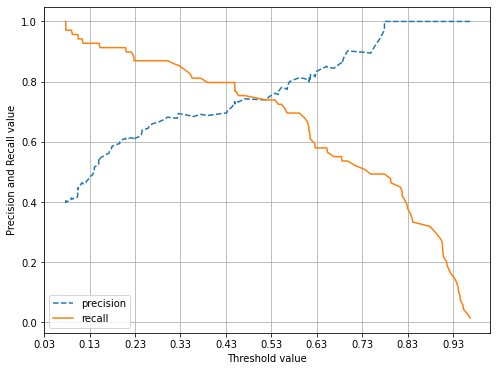

In [57]:
def precision_recall_curve_plot(y_test , pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

# F1 Score
F1 Score는 정밀도와 재현율이 어느한쪽으로 치우치지 않는 수치를 나타낼때 사용한다.

F1 = 2 / (1/recall)+(1/precision)

In [58]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print(f1)

0.7391304347826085


In [59]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[86 24]
 [14 55]]
정확도: 0.7877, 정밀도: 0.6962, 재현율: 0.7971, F1:0.7432
임곗값: 0.45
오차 행렬
[[91 19]
 [16 53]]
정확도: 0.8045, 정밀도: 0.7361, 재현율: 0.7681, F1:0.7518
임곗값: 0.5
오차 행렬
[[92 18]
 [18 51]]
정확도: 0.7989, 정밀도: 0.7391, 재현율: 0.7391, F1:0.7391
임곗값: 0.55
오차 행렬
[[96 14]
 [19 50]]
정확도: 0.8156, 정밀도: 0.7812, 재현율: 0.7246, F1:0.7519
임곗값: 0.6
오차 행렬
[[99 11]
 [22 47]]
정확도: 0.8156, 정밀도: 0.8103, 재현율: 0.6812, F1:0.7402


# ROC Curve와 AUC

ROC곡선은 FPR이 변할때 TPR(재현율)이 어떻게 변하는지를 나타내는 곡선이다.

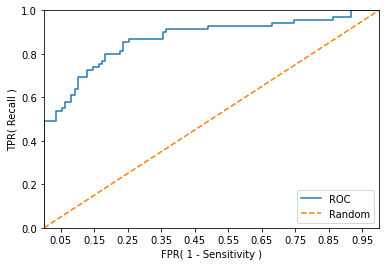

In [61]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , pred_proba_c1):
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    plt.plot(fprs , tprs, label='ROC') 
    plt.plot([0, 1], [0, 1], '--', label='Random')
       
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [67]:
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
get_clf_eval(y_test, pred, pred_proba_1)

오차 행렬
[[92 18]
 [18 51]]
정확도: 0.7989, 정밀도: 0.7391, 재현율: 0.7391,F1: 0.7391, AUC:0.8693
